# NDVI calculation from Sentinel-2 data

This is a simple example notebook to demonstrate xcengine functionality. 

In [1]:
import pathlib
import xarray as xr
import rioxarray

Set the input variables: path to SAFE archive, whether to crop the input data, and the bounding box for cropping.

In [2]:
safe_path = "/data/S2/S2A_MSIL2A_20250315T101041_N0511_R022_T33VVC_20250315T140115.SAFE/"
crop = True
x0 = 440000
x1 = 500000
y0 = 6190000
y1 = 6240000

Define a function to fetch band data from the archive and crop them.

In [3]:
def fetch_band(name: str):
    paths = list(pathlib.Path(safe_path).glob(f"GRANULE/*/IMG_DATA/R10m/*B{name}*"))
    assert len(paths) == 1
    array = rioxarray.open_rasterio(paths[0]).squeeze()
    if crop:
        return array.sel(x=slice(x0, x1), y=slice(y1, y0))
    else:
        return array

In [4]:
b04 = fetch_band("04")
b08 = fetch_band("08")

Calculate the NDVI as an array.

In [5]:
ndvi_array = (b08 - b04) / (b08 + b04)

Create a dataset containing the NDVI values and the input bands as separate variables, and show a summary of it in the notebook.

In [9]:
ndvi = xr.Dataset(dict(ndvi=ndvi_array, b04=b04, b08=b08))
ndvi

<xarray.Dataset> Size: 359MB
Dimensions:      (x: 6000, y: 4980)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 48kB 4.4e+05 4.4e+05 4.4e+05 ... 5e+05 5e+05 5e+05
  * y            (y) float64 40kB 6.24e+06 6.24e+06 ... 6.19e+06 6.19e+06
    spatial_ref  int64 8B 0
Data variables:
    ndvi         (y, x) float64 239MB nan nan nan nan ... 33.14 33.23 0.002022
    b04          (y, x) uint16 60MB ...
    b08          (y, x) uint16 60MB ...

Show a plot of the NDVI values in the notebook.

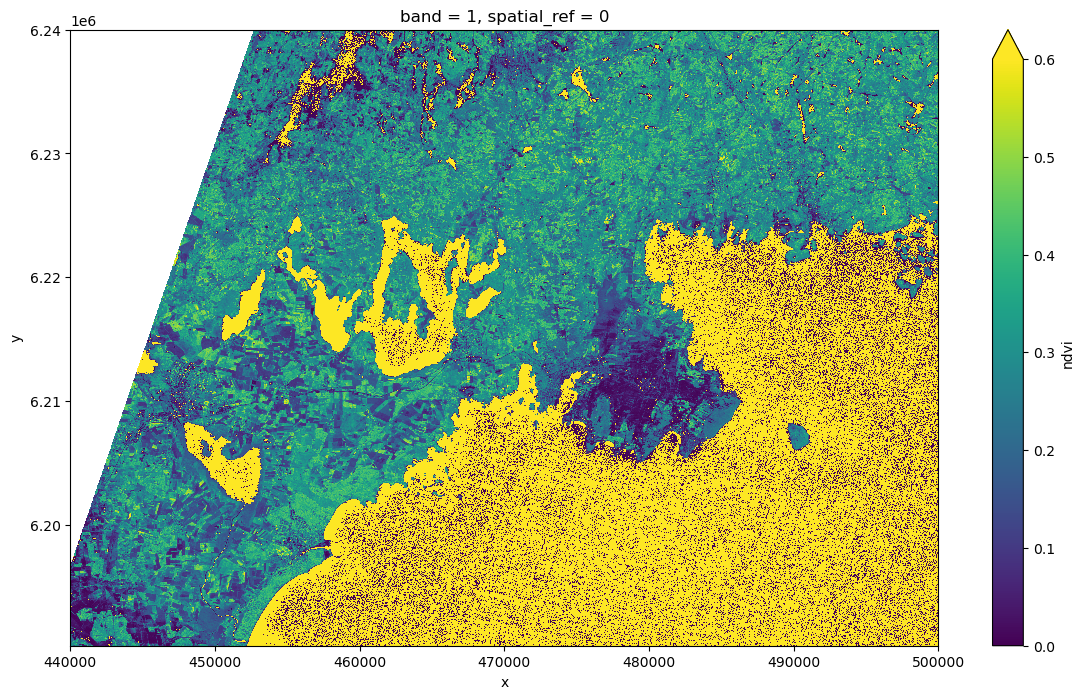

In [7]:
ndvi.ndvi.plot.imshow(vmax=0.6, figsize=(14, 8))